In [ ]:
# about dataset and problem statement

In [ ]:
"""
# variables:

# age : age of the client 
# job : type of the job 
# marital : marital status
# education : level of education 
# default : loan defaulter or not
# balance : bank balance in dollers
# housing : client have the house loan or not
# loan : client have the personal loan or not 
# contact : type of the contact of the client  
# day : last contact day of the client 
# month : last contact month of the client 
# duration : call duartion with the client(in sec's)
# campaign : no of times contacted with client in the entire campaign 
# pdays : no of days before client contacted 
# previous : no of times contacted with client in the before the campaign
# poutcome : outcome of the previous marketing campaign

# ------------------------------------------------------------------------------------------------------

target: has the client subscribed any investment scheme for example term deposit? (binary:"yes","no")
"""

In [1]:
#Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('finance_bank.csv')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df=data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.isnull().sum().sum()

0

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
print("unique values \n", df.nunique())

unique values 
 age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64


In [10]:
print("unique values \n", df.nunique)

unique values 
 <bound method DataFrame.nunique of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   



In [11]:
# replace unknown to NaN
df=df.replace("unknown",np.nan)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [12]:
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
Target           0
dtype: int64

In [13]:
# lets find the % of missing value
print(df.isnull().sum()/len(df)*100)

age           0.000000
job           0.637013
marital       0.000000
education     4.107407
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      28.798301
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome     81.747805
Target        0.000000
dtype: float64


In [15]:
df["contact"].value_counts()

cellular     29285
telephone     2906
Name: contact, dtype: int64

In [16]:
# we can drop these two columns contact and poutcome
df.drop(columns={"contact","poutcome"},inplace=True)

In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,Target
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,NaN,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,NaN,single,NaN,no,1,no,no,5,may,198,1,-1,0,no


In [18]:
df.isnull().sum()

age             0
job           288
marital         0
education    1857
default         0
balance         0
housing         0
loan            0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
Target          0
dtype: int64

In [19]:
# handle the missing value of Job and education
df["job"]=df["job"].fillna(df["job"].mode()[0])
df["education"]=df["education"].fillna(df["education"].mode()[0])

In [20]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
Target       0
dtype: int64

In [21]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,Target
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,5,may,198,1,-1,0,no


In [22]:
# mapping the string "yes", "No" to 1 and 0
df["default"]=df["default"].map({"yes":1,"no":0})
df["housing"]=df["housing"].map({"yes":1,"no":0})
df["loan"]=df["loan"].map({"yes":1,"no":0})
df["Target"]=df["Target"].map({"yes":1,"no":0})

In [23]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,Target
0,58,management,married,tertiary,0,2143,1,0,5,may,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,5,may,76,1,-1,0,0
3,47,blue-collar,married,secondary,0,1506,1,0,5,may,92,1,-1,0,0
4,33,blue-collar,single,secondary,0,1,0,0,5,may,198,1,-1,0,0


In [24]:
#apply the map apaproach for month
df['month']=df['month'].map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})

In [25]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,Target
0,58,management,married,tertiary,0,2143,1,0,5,5,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,5,5,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,5,5,76,1,-1,0,0
3,47,blue-collar,married,secondary,0,1506,1,0,5,5,92,1,-1,0,0
4,33,blue-collar,single,secondary,0,1,0,0,5,5,198,1,-1,0,0


In [26]:
df["month"].value_counts()

5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: month, dtype: int64

In [27]:
df["Target"].value_counts()

0    39922
1     5289
Name: Target, dtype: int64

In [ ]:
# plot a count plot

<AxesSubplot:xlabel='Target', ylabel='count'>

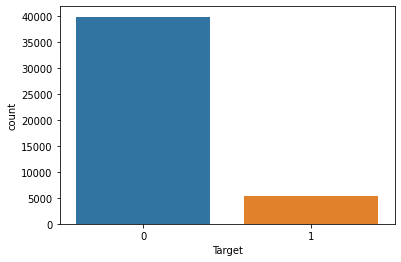

In [28]:
sns.countplot(x="Target",data=df)

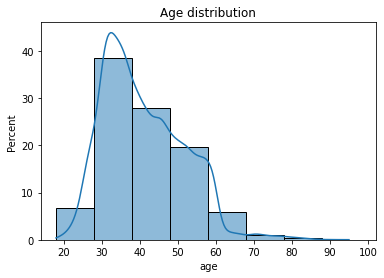

In [35]:
# age class distribution
age_plot=sns.histplot(data=df,x="age",binwidth=10,stat="percent",kde=True).set(title="Age distribution")

In [ ]:
# most of the customers ages are 28 to 55 

In [ ]:
# please do work on different visualization individually as well as in combinations( for exp Job & age)

<AxesSubplot:>

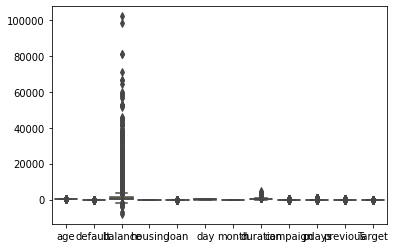

In [36]:
# outliers
sns.boxplot(data=df)

In [37]:
df.describe()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,Target
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,6.144655,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,2.408034,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   day        45211 non-null  int64 
 9   month      45211 non-null  int64 
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  Target     45211 non-null  int64 
dtypes: int64(12), object(3)
memory usage: 5.2+ MB


In [39]:
df["job"].value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [40]:
df["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [41]:
df["education"].value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

In [ ]:
# we can try the mapping approach also , we we know the demain 

In [43]:
# Label encoding approach---- another approach
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [44]:
df1=pd.get_dummies(df,columns=["job","marital","education"])

In [45]:
df1.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
0,58,0,2143,1,0,5,5,261,1,-1,...,0,0,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,0,0,1,0,0,0,1,0,1,0
2,33,0,2,1,1,5,5,76,1,-1,...,0,0,0,0,0,1,0,0,1,0
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,0,0,0,1,0,0,1,0
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,0,0,0,0,1,0,1,0


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   month                45211 non-null  int64
 7   duration             45211 non-null  int64
 8   campaign             45211 non-null  int64
 9   pdays                45211 non-null  int64
 10  previous             45211 non-null  int64
 11  Target               45211 non-null  int64
 12  job_admin.           45211 non-null  uint8
 13  job_blue-collar      45211 non-null  uint8
 14  job_entrepreneur     45211 non-null  uint8
 15  job_housemaid        45211 non-null  uint8
 16  job_management       4

In [ ]:
# splitting in dependent and independent variable

In [47]:
X=df1.drop(["Target"],axis=1)
Y=df1["Target"]

In [49]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [50]:
scaler=RobustScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
0,1.266667,0.0,1.250000,0.0,0.0,-0.846154,-0.333333,0.375000,-0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
1,0.333333,0.0,-0.308997,0.0,0.0,-0.846154,-0.333333,-0.134259,-0.5,0.0,...,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0
2,-0.400000,0.0,-0.328909,0.0,1.0,-0.846154,-0.333333,-0.481481,-0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.533333,0.0,0.780236,0.0,0.0,-0.846154,-0.333333,-0.407407,-0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.400000,0.0,-0.329646,-1.0,0.0,-0.846154,-0.333333,0.083333,-0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0


In [ ]:
# multi collinearity

In [53]:
df.corr(method='spearman')

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,Target
age,1.000000,-0.014681,0.096380,-0.154340,-0.004720,-0.008948,0.114384,-0.033257,0.037136,-0.017468,-0.011900,-0.008750
default,-0.014681,1.000000,-0.167739,-0.006025,0.077234,0.009727,0.020317,-0.007100,0.014265,-0.038053,-0.039279,-0.022419
balance,0.096380,-0.167739,1.000000,-0.068292,-0.128966,0.001329,0.052132,0.042651,-0.030959,0.069676,0.079536,0.100295
housing,-0.154340,-0.006025,-0.068292,1.000000,0.041323,-0.027605,-0.263224,0.005187,-0.037807,0.080977,0.062087,-0.139173
loan,-0.004720,0.077234,-0.128966,0.041323,1.000000,0.012205,0.029590,-0.013211,0.001587,-0.029571,-0.030700,-0.068185
day,-0.008948,0.009727,0.001329,-0.027605,0.012205,1.000000,0.117005,-0.058142,0.139581,-0.092226,-0.087780,-0.029548
month,0.114384,0.020317,0.052132,-0.263224,0.029590,0.117005,1.000000,-0.045469,0.106761,-0.125111,-0.105835,0.012410
duration,-0.033257,-0.007100,0.042651,0.005187,-0.013211,-0.058142,-0.045469,1.000000,-0.107962,0.028698,0.031175,0.342469
campaign,0.037136,0.014265,-0.030959,-0.037807,0.001587,0.139581,0.106761,-0.107962,1.000000,-0.112284,-0.108448,-0.084054
pdays,-0.017468,-0.038053,0.069676,0.080977,-0.029571,-0.092226,-0.125111,0.028698,-0.112284,1.000000,0.985645,0.154055


<AxesSubplot:>

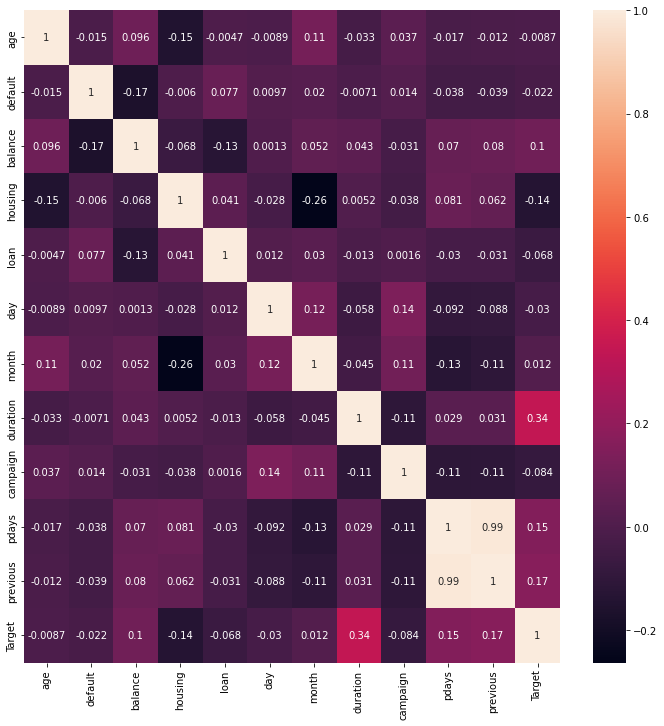

In [56]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(method='spearman'),annot=True)

<AxesSubplot:>

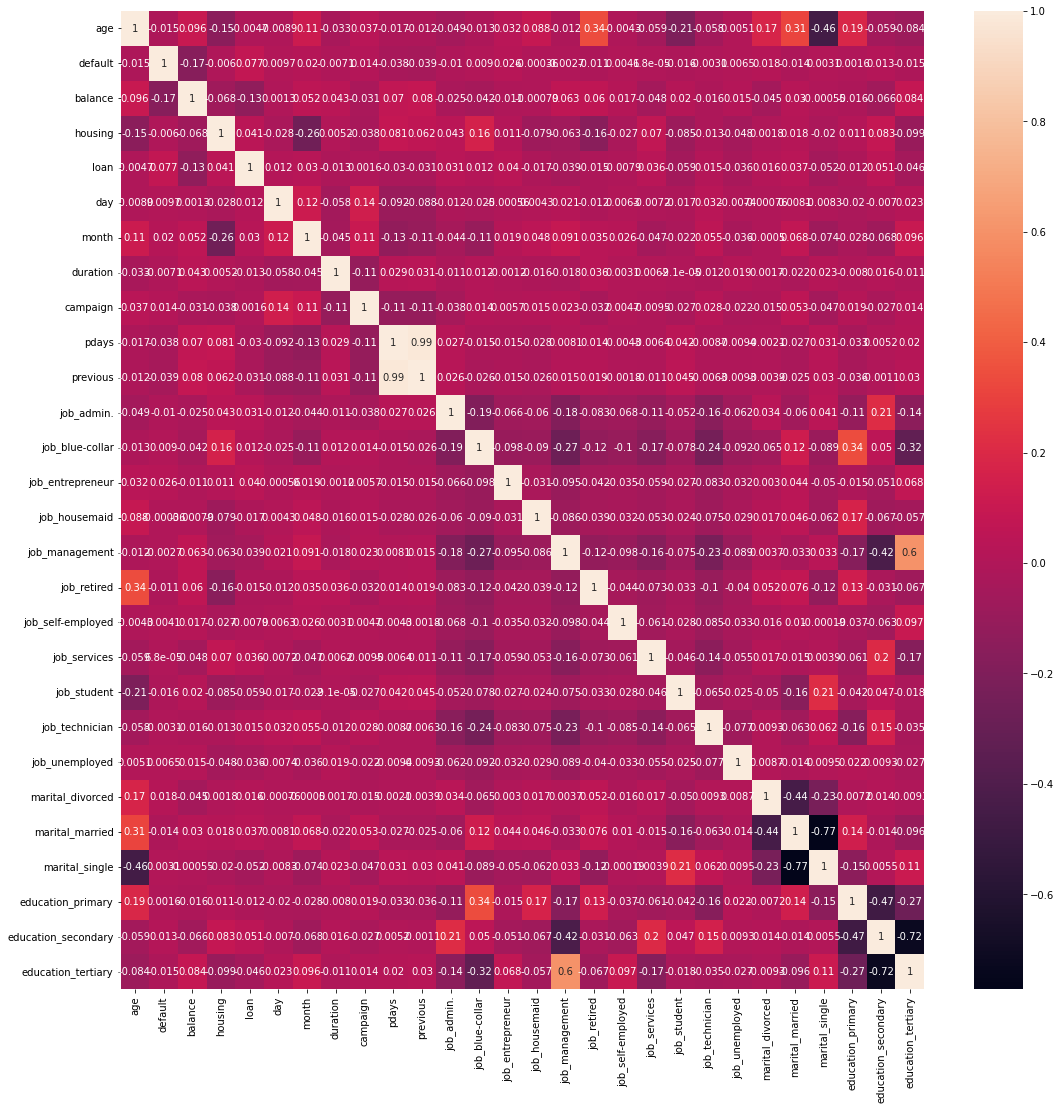

In [58]:
plt.figure(figsize=(18,18))
sns.heatmap(X_scaled.corr(method='spearman'),annot=True)

In [ ]:
#